In [1]:
import csv 
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
#from .add_noise import *

In [144]:
# metadata of dicom files. corresponding dicom file name is in the column file
meta_df = pd.read_csv('/mnt/storage/breast_cancer_kaggle/train_images_png/metadata.csv', dtype='str')
# mapping from dicom file to pngs 
maps_df = pd.read_csv('/mnt/storage/breast_cancer_kaggle/train_images_png/mapping.csv', dtype='str')
print(len(meta_df))
print(len(maps_df))

54706
54706


In [145]:
df = pd.merge(meta_df, maps_df, left_on='file', right_on='Original DICOM file location') 

In [146]:
df.shape

(54706, 37)

In [147]:
df['png_path'] =df[' PNG location '].apply(lambda x: x.strip(" "))

In [148]:
df_dcm = df

In [149]:
# merge two dataframe to get view
df_dcm['patient_image_id'] = df_dcm['PatientID'].str.cat(df_dcm['InstanceNumber'].astype(str), sep='.')
df_org = pd.read_csv("/mnt/storage/breast_cancer_kaggle/train.csv", dtype='str')
df_org['patient_image_id'] = df_org['patient_id'].str.cat(df_org['image_id'].astype(str), sep='.')
df_merge = df_dcm.merge(df_org[['patient_image_id', 'view', 'implant', 'cancer']], on='patient_image_id', how='left')

In [150]:
df_merge

,BitsAllocated,BitsStored,BodyPartThickness,Columns,CompressionForce,ContentDate,ContentTime,ExposureControlMode,ExposureControlModeDescription,HighBit,...,PartialView,PixelPaddingValue,PixelSpacing,Original DICOM file location,PNG location,png_path,patient_image_id,view,implant,cancer
0,16,12,44.0,1914,80.0,20221118,184202.095773,AUTOMATIC,AOP standard RECTANGLE 1002 mm 10 mm 180 mm 2...,11,...,NaN,NaN,NaN,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,19363.1845864194,CC,0,0
1,16,12,37.0,1914,60.0,20221118,184202.034778,AUTOMATIC,AOP standard RECTANGLE 1692 mm 10 mm 180 mm 2...,11,...,NaN,NaN,NaN,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,19363.1366950927,MLO,0,0
2,16,12,40.0,1914,60.0,20221118,184201.903925,AUTOMATIC,AOP standard RECTANGLE 342 mm 10 mm 180 mm 24...,11,...,NaN,NaN,NaN,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,19363.980208105,MLO,0,0
3,16,12,40.0,1914,50.0,20221118,184201.968028,AUTOMATIC,AOP standard RECTANGLE 1032 mm 280 mm 180 mm ...,11,...,NaN,NaN,NaN,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,19363.1098809657,MLO,0,0
4,16,12,43.0,1914,100.0,20221118,184201.818997,AUTOMATIC,AOP standard RECTANGLE 1122 mm 460 mm 180 mm ...,11,...,NaN,NaN,NaN,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,19363.559052859,CC,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,16,12,40.0,2560,55.15768,20221118,185450.302938,AUTOMATIC,AutoFilter,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,61432.1686401146,CC,0,0
54702,16,12,43.0,2560,80.51243,20221118,185451.166492,AUTOMATIC,AutoFilter,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,61432.2120329834,CC,0,0
54703,16,12,NaN,2082,NaN,20221118,184903.738363,NaN,NaN,11,...,NO,0.0,NaN,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,45529.331517958,MLO,0,0
54704,16,12,NaN,2082,NaN,20221118,184903.407725,NaN,NaN,11,...,NO,0.0,NaN,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,45529.342259561,MLO,0,0


In [163]:
# sort and drop duplicate records
df_sort = df_merge.sort_values(['StudyInstanceUID','ContentTime'], ascending=False)
df_final = df_sort.drop_duplicates(subset=['StudyInstanceUID','ImageLaterality', 'view']) # also the view (add later)

# get CC/MLO view data
df_cc = df_final[df_final['view']=='CC']
df_mlo = df_final[df_final['view']=='MLO']

In [164]:
#df_cc['implant'] == '1'
df_cc_abnorm = df_cc[df_cc['implant'] == '1']
df_mlo_abnorm = df_mlo[df_mlo['implant'] == '1']

In [165]:
df_mlo_abnorm

,BitsAllocated,BitsStored,BodyPartThickness,Columns,CompressionForce,ContentDate,ContentTime,ExposureControlMode,ExposureControlModeDescription,HighBit,...,PartialView,PixelPaddingValue,PixelSpacing,Original DICOM file location,PNG location,png_path,patient_image_id,view,implant,cancer
2807,16,12,91.0,3328,83.18135,20221118,185443.230428,AUTOMATIC,AutoFilter,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9814.1970727865,MLO,1,0
2805,16,12,85.0,3328,94.30185,20221118,185440.859689,AUTOMATIC,AutoFilter,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9814.443154885,MLO,1,0
7600,16,12,95.0,2560,0.0,20221118,185216.157047,MANUAL,Manual,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9098.1994404664,MLO,1,0
7595,16,12,93.0,2560,16.45834,20221118,185215.117622,MANUAL,Manual,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9098.96599380,MLO,1,0
13482,16,12,88.0,3328,35.5856,20221118,185210.533890,MANUAL,Manual,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9088.1603958243,MLO,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12339,16,12,73.0,2560,49.37502,20221118,184007.961808,MANUAL,Manual,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,11158.1098212703,MLO,1,0
32894,16,12,82.0,2560,68.05746,20221118,184245.097737,MANUAL,Manual,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10960.746867174,MLO,1,0
32886,16,12,51.0,2560,40.47862,20221118,184244.402488,AUTOMATIC,AutoFilter,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10960.1982284680,MLO,1,0
5077,16,12,46.0,2560,46.26128,20221118,184142.936597,AUTOMATIC,AutoFilter,11,...,NaN,0.0,"('0.065238', '0.065238')",/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10851.504613176,MLO,1,0


In [162]:
def plot_img(path): 
    with  Image.open(path) as f: 
        arr = np.array(f) 
    plt.imshow(arr,cmap='gray')
    plt.axis('off')

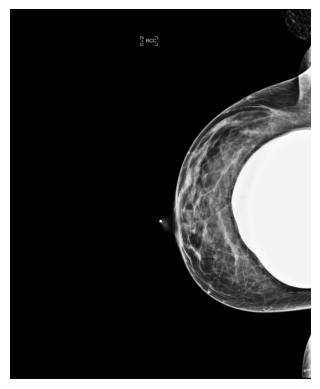

In [158]:
plot_img(df_cc['png_path'].iloc[4])

Text(0.5, 1.0, 'Monochrome 2 Image')

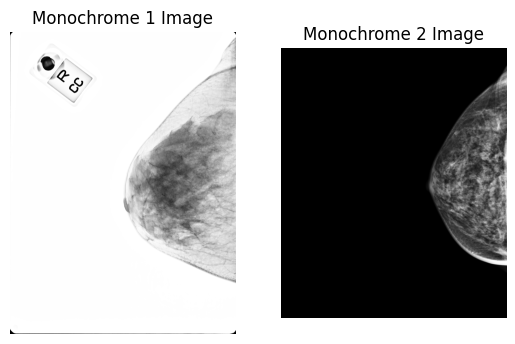

In [119]:
plt.subplot(1,2,1) 
plot_img(df[df['PhotometricInterpretation']=='MONOCHROME1'].iloc[0]['png_path'])
plt.title("Monochrome 1 Image")
plt.subplot(1,2,2) 
plot_img(df[df['PhotometricInterpretation']=='MONOCHROME2'].iloc[0]['png_path'])
plt.title("Monochrome 2 Image")

## split train, val and test from outside data

# split train, val, test

In [159]:
# Split dataset into train, val, and test
from sklearn.model_selection import train_test_split

train_ids, rem_ids = train_test_split(df_cc_abnorm['PatientID'].unique(),test_size=0.30,random_state=1996)
df_cc_abnorm.loc[:,('split')] = None 
df_cc_abnorm.loc[:, ('noise')] = None
df_cc_abnorm.loc[:, ('label')] = 0
df_cc_abnorm.loc[df_cc_abnorm['PatientID'].isin(train_ids),'split'] = 'train'  
val_ids, test_ids = train_test_split(rem_ids, test_size=0.5, random_state=1996)
df_cc_abnorm.loc[df_cc_abnorm['PatientID'].isin(val_ids), 'split'] = 'val'
df_cc_abnorm.loc[df_cc_abnorm['PatientID'].isin(test_ids),'split'] = 'test' 

train_df_cc = df_cc_abnorm[df_cc_abnorm['split']=='train']
val_df_cc = df_cc_abnorm[df_cc_abnorm['split']=='val']
test_df_cc = df_cc_abnorm[df_cc_abnorm['split']=='test']


In [167]:
# Split dataset into train, val, and test
from sklearn.model_selection import train_test_split

train_ids, rem_ids = train_test_split(df_mlo_abnorm['PatientID'].unique(),test_size=0.30,random_state=1996)
df_mlo_abnorm.loc[:,('split')] = None 
df_mlo_abnorm.loc[:, ('noise')] = None
df_mlo_abnorm.loc[:, ('label')] = 0
df_mlo_abnorm.loc[df_mlo_abnorm['PatientID'].isin(train_ids),'split'] = 'train'  
val_ids, test_ids = train_test_split(rem_ids, test_size=0.5, random_state=1996)
df_mlo_abnorm.loc[df_mlo_abnorm['PatientID'].isin(val_ids), 'split'] = 'val'
df_mlo_abnorm.loc[df_mlo_abnorm['PatientID'].isin(test_ids),'split'] = 'test' 

train_df_mlo = df_mlo_abnorm[df_mlo_abnorm['split']=='train']
val_df_mlo = df_mlo_abnorm[df_mlo_abnorm['split']=='val']
test_df_mlo = df_mlo_abnorm[df_mlo_abnorm['split']=='test']

/tmp/ipykernel_146204/1456552906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlo_abnorm.loc[:,('split')] = None
/tmp/ipykernel_146204/1456552906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlo_abnorm.loc[:, ('noise')] = None
/tmp/ipykernel_146204/1456552906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [166]:
train_df_cc['PatientID'].unique()

array(['9814', '9098', '9088', '9028', '8702', '8698', '7316', '7136',
       '7010', '6711', '65456', '64749', '64578', '63981', '63351',
       '62608', '61508', '61149', '61047', '60424', '59678', '59307',
       '5880', '58773', '58616', '56919', '56666', '56433', '55836',
       '55802', '55203', '5509', '54713', '54350', '53879', '53651',
       '53169', '52868', '52509', '50601', '50410', '50039', '49820',
       '48154', '47542', '46706', '4659', '46268', '46199', '46143',
       '45054', '4495', '43660', '43390', '43162', '42987', '42502',
       '41347', '41219', '41176', '40747', '393', '39291', '38743',
       '37940', '37862', '36894', '3668', '36438', '36373', '35608',
       '34736', '33581', '32292', '31781', '30695', '30521', '29670',
       '29472', '28214', '27283', '27203', '27083', '26979', '26940',
       '26937', '26748', '26644', '25823', '25578', '24845', '24754',
       '24553', '24347', '23520', '23419', '22528', '21827', '2111',
       '20657', '20540', '203

In [168]:
train_df_mlo['PatientID'].unique()

array(['9814', '9098', '9088', '9028', '8702', '8698', '7316', '7136',
       '7010', '6711', '65456', '64749', '64578', '63981', '63351',
       '62608', '61508', '61149', '61047', '60424', '59678', '59307',
       '5880', '58773', '58616', '56919', '56666', '56433', '55836',
       '55802', '55203', '5509', '54713', '54350', '53879', '53651',
       '53169', '52868', '52509', '50601', '50410', '50039', '49820',
       '48154', '47542', '46706', '4659', '46268', '46199', '46143',
       '45054', '4495', '43660', '43390', '43162', '42987', '42502',
       '41347', '41219', '41176', '40747', '393', '39291', '38743',
       '37940', '37862', '36894', '3668', '36438', '36373', '35608',
       '34736', '33581', '32292', '31781', '30695', '30521', '29670',
       '29472', '28214', '27283', '27203', '27083', '26979', '26940',
       '26937', '26748', '26644', '25823', '25578', '24845', '24754',
       '24553', '24347', '23520', '23419', '22528', '21827', '2111',
       '20657', '20540', '203

In [169]:
# Add noise to dataset
noise_type = ['gaussian', 'none', 'salt_pepper', 'distort']
normal_noise = np.random.choice(noise_type, len(train_df_cc['PatientID'].unique()), p=[0.5, 0.5, 0, 0])
print(len(normal_noise))
noise_dict = dict(zip(train_df_cc['PatientID'].unique(), normal_noise))

119


In [171]:
noise_type = ['gaussian', 'none', 'salt_pepper', 'distort']
normal_noise = np.random.choice(noise_type, len(train_df_mlo['PatientID'].unique()), p=[0.5, 0.5, 0, 0])
print(len(normal_noise))
noise_dict = dict(zip(train_df_cc['PatientID'].unique(), normal_noise))

119


In [170]:
noise_dict.keys()
noise_dict.values()

dict_values(['none', 'none', 'gaussian', 'none', 'gaussian', 'none', 'gaussian', 'gaussian', 'gaussian', 'none', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'none', 'none', 'gaussian', 'gaussian', 'none', 'gaussian', 'none', 'none', 'gaussian', 'gaussian', 'none', 'none', 'none', 'none', 'none', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'none', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian', 'none', 'gaussian', 'gaussian', 'none', 'none', 'gaussian', 'none', 'none', 'gaussian', 'none', 'gaussian', 'gaussian', 'gaussian', 'none', 'gaussian', 'none', 'none', 'none', 'none', 'none', 'gaussian', 'none', 'gaussian', 'gaussian', 'gaussian', 'none', 'gaussian', 'none', 'none', 'gaussian', 'none', 'gaussian', 'none', 'gaussian', 'gaussian', 'gaussian', 'none', 'none', 'none', 'none', 'gaussian', 'none', 'gaussian', 'gaussian', 'gaussian', 'none', 'none', 'gaussian', 'gaussian', 'gaussian', 'none', 'gaussian', 'gaussian', 'ga

In [172]:
train_df_cc

,BitsAllocated,BitsStored,BodyPartThickness,Columns,CompressionForce,ContentDate,ContentTime,ExposureControlMode,ExposureControlModeDescription,HighBit,...,Original DICOM file location,PNG location,png_path,patient_image_id,view,implant,cancer,split,noise,label
2802,16,12,74.0,3328,91.63293,20221118,185442.812449,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9814.1149002441,CC,1,0,train,None,0
2801,16,12,73.0,3328,100.0845,20221118,185441.248964,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9814.1064110749,CC,1,0,train,None,0
7593,16,12,83.0,2560,19.57208,20221118,185216.402968,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9098.2140472329,CC,1,0,train,None,0
7589,16,12,31.0,2560,35.14078,20221118,185215.399951,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9098.1938067381,CC,1,0,train,None,0
13483,16,12,88.0,3328,36.03042,20221118,185210.184538,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9088.1263577273,CC,1,0,train,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12329,16,12,39.0,2560,40.0338,20221118,184008.268851,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,11158.1348086609,CC,1,0,train,None,0
32892,16,12,88.0,2560,62.2748,20221118,184245.463539,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10960.2116616347,CC,1,0,train,None,0
32889,16,12,47.0,2560,0.0,20221118,184243.890524,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10960.1019978559,CC,1,0,train,None,0
5071,16,12,40.0,2560,46.26128,20221118,184143.242018,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10851.1797968584,CC,1,0,train,None,0


In [173]:
train_df_mlo

,BitsAllocated,BitsStored,BodyPartThickness,Columns,CompressionForce,ContentDate,ContentTime,ExposureControlMode,ExposureControlModeDescription,HighBit,...,Original DICOM file location,PNG location,png_path,patient_image_id,view,implant,cancer,split,noise,label
2807,16,12,91.0,3328,83.18135,20221118,185443.230428,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9814.1970727865,MLO,1,0,train,None,0
2805,16,12,85.0,3328,94.30185,20221118,185440.859689,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9814.443154885,MLO,1,0,train,None,0
7600,16,12,95.0,2560,0.0,20221118,185216.157047,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9098.1994404664,MLO,1,0,train,None,0
7595,16,12,93.0,2560,16.45834,20221118,185215.117622,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9098.96599380,MLO,1,0,train,None,0
13482,16,12,88.0,3328,35.5856,20221118,185210.533890,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,9088.1603958243,MLO,1,0,train,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12339,16,12,73.0,2560,49.37502,20221118,184007.961808,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,11158.1098212703,MLO,1,0,train,None,0
32894,16,12,82.0,2560,68.05746,20221118,184245.097737,MANUAL,Manual,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10960.746867174,MLO,1,0,train,None,0
32886,16,12,51.0,2560,40.47862,20221118,184244.402488,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10960.1982284680,MLO,1,0,train,None,0
5077,16,12,46.0,2560,46.26128,20221118,184142.936597,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,10851.504613176,MLO,1,0,train,None,0


In [126]:
train_df_cc.loc[:,('noise')] = train_df_cc['PatientID'].map(noise_dict)
group_p = train_df_cc.groupby(['PatientID'])
group_p.get_group(train_df_cc['PatientID'].iloc[8])

,BitsAllocated,BitsStored,BodyPartThickness,Columns,CompressionForce,ContentDate,ContentTime,ExposureControlMode,ExposureControlModeDescription,HighBit,...,Original DICOM file location,PNG location,png_path,patient_image_id,view,implant,cancer,split,noise,label
37383,16,12,34.0,2560,46.7061,20221118,185303.966831,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,8702.282573396,CC,1,0,train,gaussian,0
37386,16,12,38.0,2560,40.92344,20221118,185303.250812,AUTOMATIC,AutoFilter,11,...,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/breast_cancer_kaggle/train_image...,/mnt/storage/breast_cancer_kaggle/train_images...,8702.1839551501,CC,1,0,train,gaussian,0


In [127]:
# Add noise to dataset
noise_type = ['gaussian', 'none', 'salt_pepper', 'distort']

train_noise = np.random.choice(noise_type, len(train_df_cc['PatientID'].unique()), p=[0.5, 0.5, 0, 0])
train_noise_dict = dict(zip(train_df_cc['PatientID'].unique(), train_noise))
train_df_cc.loc[:,('noise')] = train_df_cc['PatientID'].map(train_noise_dict)

val_noise = np.random.choice(noise_type, len(val_df_cc['PatientID'].unique()), p=[0.5, 0.5, 0, 0])
val_noise_dict = dict(zip(val_df_cc['PatientID'].unique(), val_noise))
val_df_cc.loc[:,('noise')] = val_df_cc['PatientID'].map(val_noise_dict)

test_noise = np.random.choice(noise_type, len(test_df_cc['PatientID'].unique()), p=[0.2, 0.3, 0.3, 0.2])
test_noise_dict = dict(zip(test_df_cc['PatientID'].unique(), test_noise))
test_df_cc.loc[:,('noise')] = test_df_cc['PatientID'].map(test_noise_dict)

# modify label for test set
test_df_cc.loc[test_df_cc.noise == 'salt_pepper', 'label'] = 1
test_df_cc.loc[test_df_cc.noise == 'distort', 'label'] = 1 

In [174]:
# Add noise to dataset
noise_type = ['gaussian', 'none', 'salt_pepper', 'distort']

train_noise = np.random.choice(noise_type, len(train_df_mlo['PatientID'].unique()), p=[0.5, 0.5, 0, 0])
train_noise_dict = dict(zip(train_df_mlo['PatientID'].unique(), train_noise))
train_df_mlo.loc[:,('noise')] = train_df_mlo['PatientID'].map(train_noise_dict)

val_noise = np.random.choice(noise_type, len(val_df_mlo['PatientID'].unique()), p=[0.5, 0.5, 0, 0])
val_noise_dict = dict(zip(val_df_mlo['PatientID'].unique(), val_noise))
val_df_mlo.loc[:,('noise')] = val_df_mlo['PatientID'].map(val_noise_dict)

test_noise = np.random.choice(noise_type, len(test_df_mlo['PatientID'].unique()), p=[0.2, 0.3, 0.3, 0.2])
test_noise_dict = dict(zip(test_df_mlo['PatientID'].unique(), test_noise))
test_df_mlo.loc[:,('noise')] = test_df_mlo['PatientID'].map(test_noise_dict)

# modify label for test set
test_df_mlo.loc[test_df_mlo.noise == 'salt_pepper', 'label'] = 1
test_df_mlo.loc[test_df_mlo.noise == 'distort', 'label'] = 1 

# crop and stitch

In [175]:
import pandas as pd
import numpy as np
import os
import pickle as pkl
import re
import matplotlib.pyplot as plt
import cv2
from skimage import io
import skimage.io
import skimage.measure as skmeas
import sys
import numpy as np
#import SimpleITK as sitk

def calc_size(bbox):
    #print("bbox in calc_size", bbox)
    a = bbox[2] - bbox[0]
    b = bbox[3] - bbox[1]
    return a*b


def stitch_images(x,y):
    diff = abs(x.shape[0] - y.shape[0])
    if x.shape[0] < y.shape[0]:
        z = np.zeros((diff, x.shape[1]))
        x = np.concatenate((x, z), axis=0)
    else:
        if x.shape[0] > y.shape[0]:
            z = np.zeros((diff, y.shape[1]))
            y = np.concatenate((y, z), axis=0)
    img = np.concatenate((x,y), axis=1)
    
    if img.shape[1]>img.shape[0]:
        #print('wide')
        diff = img.shape[1]-img.shape[0]
        z = np.zeros((diff, img.shape[1]))
        img = np.concatenate((img, z), axis=0)
        img = np.array(img, dtype='uint8')

    elif img.shape[0]>img.shape[1]:
        #print('tall')
        diff = img.shape[0]-img.shape[1]
        z1 = np.zeros((img.shape[0], int(diff/2)))
        z2 = np.zeros((img.shape[0], diff - int(diff/2)))
        img = np.concatenate((z2, img, z1), axis=1)
        img = np.array(img, dtype='uint8')
    else:
        print('square')
        
    return img

def segment_breast(image_np):
    thresh = 0
    mask = image_np > thresh
    object_labels = skmeas.label(mask)

    some_props = skmeas.regionprops(object_labels)
    bboxes = [{'bbox':one_prop['bbox'], 'centroid':one_prop['centroid'], 'size':calc_size(one_prop['bbox'])} for one_prop in some_props]
    bbox_sizes = [bbox['size'] for bbox in bboxes]
    bbox = bboxes[np.argmax(bbox_sizes)]['bbox']
    print("bbox", bbox)

    img_crop = image_np[bbox[0]:bbox[2], bbox[1]:bbox[3]]
 

    return img_crop

original shape  (4096, 3328)
bbox (94, 0, 4079, 2528)


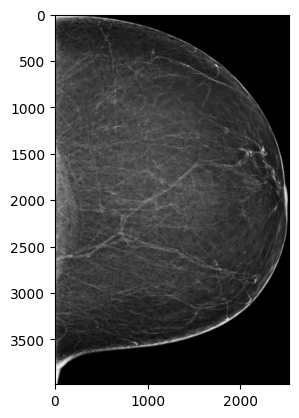

In [176]:
img_seg = Image.open(df_cc_abnorm['png_path'].iloc[0])
img_seg = np.array(img_seg)
img_norm = (((img_seg-np.min(img_seg))/(np.max(img_seg)-np.min(img_seg)))*255).astype(dtype='uint8')
print("original shape ", img_norm.shape)
img_crop = segment_breast(img_norm)
plt.imshow(img_crop, cmap='gray')

In [177]:
def check_laterality(x, laterality):
    correct_laterality = True
    if laterality == 'R':
        if np.mean(x[:,0:30]) > np.mean(x[:,-30:-1]):  # x[:,0] is the far left
            laterality = 'L'
            correct_laterality = False

    elif laterality == 'L':
        if np.mean(x[:,0:30]) < np.mean(x[:,-30:-1]):
            laterality = 'R'
            correct_laterality = False

    return correct_laterality

In [178]:
def distort_img(image):
    roll_img = np.array(image)
    A = roll_img.shape[0] / 3.0
    w = 2.0 / roll_img.shape[1]
    shift = lambda x: A * np.sin(2.0*np.pi*x * w)
    for i in range(roll_img.shape[0]):
        roll_img[:,i] = np.roll(roll_img[:,i], int(shift(i)))

    return roll_img

In [179]:
# two images processing
from torchvision import transforms
import skimage as ski
from skimage.util import random_noise

def image_process(df_view, imgSize, i): # i will be in the range of len(patient_id) or len(studyID)
    df_cc_groups = df_view.groupby(['StudyInstanceUID'])
    df_cc_group_i = df_cc_groups.get_group(df_view['StudyInstanceUID'].unique()[i])
    if len(df_cc_group_i[df_cc_group_i['ImageLaterality']=='R']) == 1:
        img_r = Image.open(df_cc_group_i[df_cc_group_i['ImageLaterality']=='R']['png_path'].iloc[0]) #get and open the png path with laterality R 
        print(df_cc_group_i[df_cc_group_i['ImageLaterality']=='R']['png_path'].iloc[0])
    else:
        exit()
    if len(df_cc_group_i[df_cc_group_i['ImageLaterality']=='L']) == 1:
        img_l = Image.open(df_cc_group_i[df_cc_group_i['ImageLaterality']=='L']['png_path'].iloc[0]) #get and open the png path with laterality L
        print(df_cc_group_i[df_cc_group_i['ImageLaterality']=='L']['png_path'].iloc[0])
    else:
        exit()
    img_r = np.array(img_r)
    img_l = np.array(img_l)

    # normalize images
    img_r = (((img_r-np.min(img_r))/(np.max(img_r)-np.min(img_r)))*255).astype(dtype='uint8')
    img_l = (((img_l-np.min(img_l))/(np.max(img_l)-np.min(img_l)))*255).astype(dtype='uint8')

    if df_cc_group_i[df_cc_group_i['ImageLaterality']=='R']['PhotometricInterpretation'].iloc[0]=='MONOCHROME1': #invert white background to black background
        print("INVERT")
        img_r = np.invert(img_r)
    if df_cc_group_i[df_cc_group_i['ImageLaterality']=='L']['PhotometricInterpretation'].iloc[0]=='MONOCHROME1': #invert white background to black background
        print("INVERT")
        img_l = np.invert(img_l)

    #print(img.shape)
    if check_laterality(img_r, 'R') == True:
        img_crop_r = segment_breast(img_r)     
    else:
        img_crop_r = segment_breast(img_l)
        
    if check_laterality(img_l, 'L') == True:
        img_crop_l = segment_breast(img_l)
    else:
        img_crop_l = segment_breast(img_r)
        
    img_conct = stitch_images(img_crop_r, img_crop_l)

    print("noise type:", df_cc_group_i['noise'].iloc[0])
    if df_cc_group_i['noise'].iloc[0] == 'gaussian':
        img_conct = random_noise(np.array(img_conct), mode='gaussian', var=0.3)
        #img_conct = np.array(255*noise_img, dtype='uint8')
    if df_cc_group_i['noise'].iloc[0] == 'salt_pepper':
        img_conct = random_noise(np.array(img_conct), mode='s&p',amount=0.2)
        #img_conct = np.array(255*noise_img, dtype='uint8')
    if df_cc_group_i['noise'].iloc[0] == 'distort':
        img_conct = distort_img(img_conct)

    transformations = transforms.Compose([transforms.ToTensor(), transforms.Resize((imgSize,imgSize), antialias=True)])
    #if transformations == None:
    resize_img = transformations(img_conct)
    
    resize_img = np.array(resize_img)
    resize_img = resize_img.reshape([imgSize,imgSize,1])
    print("after transform ",  resize_img.shape)
    
    return resize_img , df_cc_group_i['label'].iloc[0]

/mnt/storage/breast_cancer_kaggle/train_images_png/extracted-images/bf1fe0d8e6bab74c72484cd089b404b17a1ed8032e0e1f648da6fb73/c5062d6b3f51208101d4d6d69a6b8cf4e40fc037bc7b6652f9d9953e.png
/mnt/storage/breast_cancer_kaggle/train_images_png/extracted-images/bf1fe0d8e6bab74c72484cd089b404b17a1ed8032e0e1f648da6fb73/ffa2c1f6ca1a9a01a062e9036885a06713777014a9f4fa2fc7455944.png
bbox (379, 1650, 3370, 3328)
bbox (15, 0, 3301, 615)
noise type: None
after transform  (256, 256, 1)
image label is 0
max pixel 0.9936361
min pixel 0.0
max pixel 0.98727214
min pixel -1.0


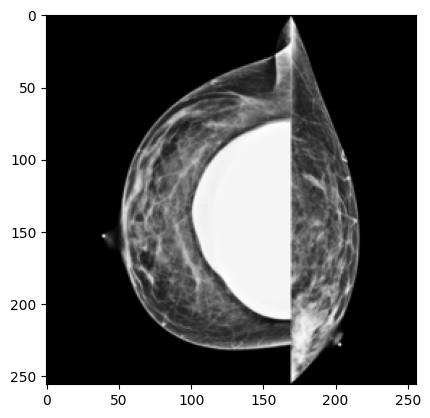

In [181]:
img_size = 256
#i = 5

img_proc, img_label = image_process(train_df_cc, img_size, 2)
print("image label is", img_label)
print('max pixel', np.max(img_proc))
print('min pixel', np.min(img_proc))
img_proc = (img_proc - 0.5) / 0.5
print('max pixel', np.max(img_proc))
print('min pixel', np.min(img_proc))
plt.imshow(img_proc, cmap='gray')

/mnt/storage/breast_cancer_kaggle/train_images_png/extracted-images/bf1fe0d8e6bab74c72484cd089b404b17a1ed8032e0e1f648da6fb73/281554bf753857ace8cd9a474f2e768f7c9b66b002a8abcbbf09a2b2.png
/mnt/storage/breast_cancer_kaggle/train_images_png/extracted-images/bf1fe0d8e6bab74c72484cd089b404b17a1ed8032e0e1f648da6fb73/fcb86e59759fe84f62bd50577c9904c4c306620cfadd50b307634b74.png
bbox (12, 1523, 4084, 3328)
bbox (12, 0, 3328, 915)
noise type: gaussian
after transform  (256, 256, 1)
image label is 0
max pixel 0.8175217598074187
min pixel 0.1651657313886556
max pixel 0.6350435196148374
min pixel -0.6696685372226888


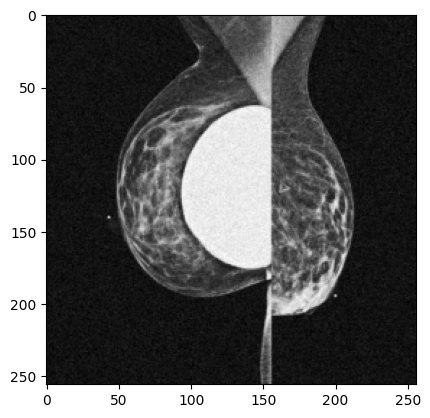

In [182]:
img_size = 256

img_proc, img_label = image_process(train_df_mlo, img_size, 2)
print("image label is", img_label)
print('max pixel', np.max(img_proc))
print('min pixel', np.min(img_proc))
img_proc = (img_proc - 0.5) / 0.5
print('max pixel', np.max(img_proc))
print('min pixel', np.min(img_proc))
plt.imshow(img_proc, cmap='gray')

## Noise

In [ ]:
import random
def add_gaussian_noise(image):
    x, y = image.size
    print(x, y)
    mean = 100
    var = 25
    sigma = np.sqrt(var)
    n = np.random.normal(loc=mean, 
                        scale=sigma, 
                        size=(y,x))
    
    print("noise: ", n)
    print(n.shape)
    gn = np.array(image)
    print(gn.shape)
    gn_img = gn+n

    return gn_img
